In [13]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [14]:
sb = gpd.read_file('sb_shapefile/SB_only.shp')
sb

,NAME_PCASE,NAME_UCASE,FMNAME_PC,FMNAME_UC,ABBREV,NUM,ABCODE,FIPS,ANSI,ISLAND,Shape_Leng,Shape_Area,geometry
0,Santa Barbara,SANTA BARBARA,Santa Barbara County,SANTA BARBARA COUNTY,SBA,42,c042,083,083,N,424655.163272,6.608866e+09,"POLYGON ((-7248.153 -322621.781, -7240.234 -32..."
1,Santa Barbara,SANTA BARBARA,Santa Barbara County,SANTA BARBARA COUNTY,SBA,42,c042,083,083,Y,220.962192,3.665768e+03,"POLYGON ((-60843.500 -346204.000, -60854.609 -..."
2,Santa Barbara,SANTA BARBARA,Santa Barbara County,SANTA BARBARA COUNTY,SBA,42,c042,083,083,Y,559.332846,8.479405e+03,"POLYGON ((-58512.125 -362150.188, -58526.457 -..."
3,Santa Barbara,SANTA BARBARA,Santa Barbara County,SANTA BARBARA COUNTY,SBA,42,c042,083,083,Y,859.536811,2.466295e+04,"POLYGON ((28638.146 -401237.438, 28642.877 -40..."
4,Santa Barbara,SANTA BARBARA,Santa Barbara County,SANTA BARBARA COUNTY,SBA,42,c042,083,083,Y,120137.609955,2.502277e+08,"POLYGON ((7485.788 -439053.938, 7488.938 -4389..."
5,Santa Barbara,SANTA BARBARA,Santa Barbara County,SANTA BARBARA COUNTY,SBA,42,c042,083,083,Y,44315.149119,3.852854e+07,"POLYGON ((-39139.164 -440591.344, -39120.691 -..."
6,Santa Barbara,SANTA BARBARA,Santa Barbara County,SANTA BARBARA COUNTY,SBA,42,c042,083,083,Y,1736.785102,1.533134e+05,"POLYGON ((-30672.670 -439903.344, -30699.912 -..."
7,Santa Barbara,SANTA BARBARA,Santa Barbara County,SANTA BARBARA COUNTY,SBA,42,c042,083,083,Y,824.624731,1.531302e+04,"POLYGON ((-38500.484 -439899.375, -38510.887 -..."
8,Santa Barbara,SANTA BARBARA,Santa Barbara County,SANTA BARBARA COUNTY,SBA,42,c042,083,083,Y,584.075619,1.794771e+04,"POLYGON ((-40617.293 -439921.594, -40624.473 -..."
9,Santa Barbara,SANTA BARBARA,Santa Barbara County,SANTA BARBARA COUNTY,SBA,42,c042,083,083,Y,888.098963,4.262273e+04,"POLYGON ((-40294.981 -440075.188, -40312.644 -..."


In [15]:
# https://stackoverflow.com/questions/18039057/pandas-parser-cparsererror-error-tokenizing-data#:~:text=This%20error%20may%20arise%20also,if%20it%27s%20there%20by%20mistake.
# there might be commas in the 
# GBIF.org (23 October 2023) GBIF Occurrence Download https://doi.org/10.15468/dl.qavhwp
raw_pigs = pd.read_csv('wild_pigs_gbif_raw.csv', sep='\t')
raw_pigs.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,95428888,b929f23d-290f-4e85-8f17-764c55b3b284,4ddf5827-e5c9-49ca-8b4a-c7d0c69fdeb4,Animalia,Chordata,Mammalia,Artiodactyla,Suidae,Sus,Sus scrofa,...,NaN,NaN,CC0_1_0,NaN,Honolulu Zoo staff,NaN,NaN,2023-09-27T16:41:37.153Z,NaN,INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY
1,95428629,b929f23d-290f-4e85-8f17-764c55b3b284,9523ff0e-4603-4637-8646-621b4a45a30a,Animalia,Chordata,Mammalia,Artiodactyla,Suidae,Sus,Sus scrofa,...,C H Kishinami,NaN,CC0_1_0,Bernice Pauahi Bishop Museum,"C H Kishinami, D J Preston, et al.",NaN,NaN,2023-09-27T16:42:01.867Z,NaN,GEODETIC_DATUM_INVALID;GEODETIC_DATUM_ASSUMED_...
2,95428623,b929f23d-290f-4e85-8f17-764c55b3b284,cd00e03d-f8d8-47ec-9d1d-0fb9563c86e2,Animalia,Chordata,Mammalia,Artiodactyla,Suidae,Sus,Sus scrofa,...,C H Kishinami,NaN,CC0_1_0,Bernice Pauahi Bishop Museum,Honolulu City & County staff,NaN,NaN,2023-09-27T16:42:03.837Z,NaN,GEODETIC_DATUM_INVALID;GEODETIC_DATUM_ASSUMED_...
3,95428616,b929f23d-290f-4e85-8f17-764c55b3b284,ed8b1aff-b69e-417e-8e44-204f6e34902a,Animalia,Chordata,Mammalia,Artiodactyla,Suidae,Sus,Sus scrofa,...,NaN,NaN,CC0_1_0,Bernice Pauahi Bishop Museum,M L Goff & F W Howarth,NaN,NaN,2023-09-27T16:41:48.856Z,NaN,CONTINENT_DERIVED_FROM_COORDINATES;INSTITUTION...
4,95428605,b929f23d-290f-4e85-8f17-764c55b3b284,a885aab8-8315-4986-b61a-787611cc7b3b,Animalia,Chordata,Mammalia,Artiodactyla,Suidae,Sus,Sus scrofa,...,NaN,NaN,CC0_1_0,Bernice Pauahi Bishop Museum,V Santarone & S Inada,NaN,NaN,2023-09-27T16:41:44.615Z,NaN,TYPE_STATUS_INVALID;INSTITUTION_MATCH_FUZZY;CO...


In [16]:
raw_pigs.columns
keep = ['gbifID', 'species', 'stateProvince', 'individualCount', 'decimalLatitude', 'decimalLongitude',
    'day',
       'month', 'year',  'institutionCode', 'collectionCode', 'catalogNumber', 
       'identifiedBy']
pigs_ca = raw_pigs.loc[raw_pigs.stateProvince == 'California', keep]
pigs_ca

,gbifID,species,stateProvince,individualCount,decimalLatitude,decimalLongitude,day,month,year,institutionCode,collectionCode,catalogNumber,identifiedBy
41,899953814,Sus scrofa,California,NaN,37.088460,-121.538122,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks
43,899951348,Sus scrofa,California,NaN,35.473539,-120.549425,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman
74,896560733,Sus scrofa,California,NaN,37.876099,-122.270633,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca..."
75,896559958,Sus scrofa,California,NaN,38.445432,-121.822973,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca..."
76,896559722,Sus scrofa,California,NaN,38.548816,-121.745590,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,1024216143,Sus scrofa,California,NaN,37.342706,-121.713413,24.0,8.0,2014.0,iNaturalist,Observations,848609,sea-kangaroo
6836,1024215805,Sus scrofa,California,NaN,37.344672,-121.718712,24.0,8.0,2014.0,iNaturalist,Observations,847708,Donna Pomeroy
6837,1024215159,Sus scrofa,California,NaN,35.397451,-120.184186,23.0,8.0,2014.0,iNaturalist,Observations,845949,Alyssa Semerdjian
6842,1019052419,Sus scrofa,California,2.0,34.048100,-119.551900,18.0,9.0,1998.0,"Borror Laboratory of Bioacoustics, Ohio State ...",Recordings,BLB30714,NaN


In [17]:
geo_pigs = gpd.GeoDataFrame(pigs_ca, 
                            geometry=gpd.points_from_xy(pigs_ca.decimalLongitude,
                                             pigs_ca.decimalLatitude),
                            crs='epsg:4326')   
geo_pigs

,gbifID,species,stateProvince,individualCount,decimalLatitude,decimalLongitude,day,month,year,institutionCode,collectionCode,catalogNumber,identifiedBy,geometry
41,899953814,Sus scrofa,California,NaN,37.088460,-121.538122,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
43,899951348,Sus scrofa,California,NaN,35.473539,-120.549425,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
74,896560733,Sus scrofa,California,NaN,37.876099,-122.270633,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
75,896559958,Sus scrofa,California,NaN,38.445432,-121.822973,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
76,896559722,Sus scrofa,California,NaN,38.548816,-121.745590,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,1024216143,Sus scrofa,California,NaN,37.342706,-121.713413,24.0,8.0,2014.0,iNaturalist,Observations,848609,sea-kangaroo,POINT (-121.71341 37.34271)
6836,1024215805,Sus scrofa,California,NaN,37.344672,-121.718712,24.0,8.0,2014.0,iNaturalist,Observations,847708,Donna Pomeroy,POINT (-121.71871 37.34467)
6837,1024215159,Sus scrofa,California,NaN,35.397451,-120.184186,23.0,8.0,2014.0,iNaturalist,Observations,845949,Alyssa Semerdjian,POINT (-120.18419 35.39745)
6842,1019052419,Sus scrofa,California,2.0,34.048100,-119.551900,18.0,9.0,1998.0,"Borror Laboratory of Bioacoustics, Ohio State ...",Recordings,BLB30714,NaN,POINT (-119.55190 34.04810)


<AxesSubplot:>

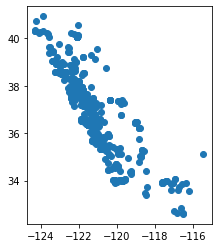

In [18]:
geo_pigs.plot()

In [19]:
geo_pigs = geo_pigs.drop(columns=['decimalLatitude','decimalLongitude'])
geo_pigs.head()

,gbifID,species,stateProvince,individualCount,day,month,year,institutionCode,collectionCode,catalogNumber,identifiedBy,geometry
41,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
43,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
74,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
75,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
76,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


In [20]:
geo_pigs = geo_pigs.rename(columns={'stateProvince':'state',
                         'institutionCode':'inst'})

In [21]:
np.sort(geo_pigs.year.unique())

array([1818., 1910., 1925., 1927., 1929., 1930., 1932., 1937., 1938.,
       1939., 1946., 1952., 1955., 1956., 1957., 1958., 1960., 1961.,
       1962., 1963., 1964., 1966., 1967., 1968., 1969., 1970., 1973.,
       1974., 1975., 1977., 1978., 1979., 1981., 1983., 1985., 1986.,
       1987., 1989., 1990., 1991., 1998., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017., 2018., 2019., 2020., 2021., 2022., 2023.,   nan])

In [22]:
geo_pigs.to_file('gbif_sus_scroga_california.shp')

/var/folders/2t/z8yp2j2x6xx2yx79s5y4w7gr0000gn/T/ipykernel_4387/2372285597.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geo_pigs.to_file('gbif_sus_scroga_california.shp')


In [26]:
pigs = gpd.read_file('gbif_sus_scroga_california/gbif_sus_scroga_california.shp')

In [29]:
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


<AxesSubplot:>

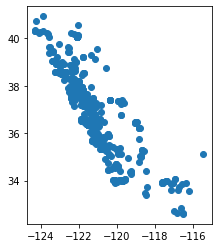

In [25]:
pigs.plot()